In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Initialising the parameters

S0 = 1000 #initial price of the underlying asset is assumed to be 1000
T = 1     #time period till maturity is assumed to be 1 year
r = 0.05  #risk-free return rate
sigma = 0.25 #the volatility
num_paths = 10000 #Number of simulations
steps = 1000 #Number of steps in each simulation

In [3]:
def simulation(S0,num_paths,steps,T,sigma,r):
    Z = np.random.randn(num_paths,steps)
    dt = T/steps

    St = np.zeros((num_paths,steps +1))
    St[:,0] = S0

    for t in range(1,steps + 1):
        St[:,t] = St[:,t-1] * (1 + r*dt + sigma*np.sqrt(dt)*Z[:,t-1])

    return St


In [4]:
def european_call(St,K,r,T):
    ST = St[:-1]
    payoffs = np.maximum(St-K,0)
    mean_payoff = np.mean(payoffs)
    discounted_price = np.exp(-r*T)*mean_payoff
    return discounted_price

In [5]:
def arithmetic_asian_call(St,K,r,T):
    AM_price = np.mean(St[:,1:],axis=1)
    payoffs = np.maximum(AM_price-K,0)
    return np.exp(-r*T)*np.mean(payoffs)

In [6]:
def geometric_asian_call(St,K,r,T):
    epsilon = 1e-4
    safe_st = np.maximum(St,epsilon)
    log_st = np.log(safe_st)
    log_gm = np.mean(log_st[:,1:],axis=1)
    GM_price = np.exp(log_gm)
    payoffs = np.maximum(GM_price-K,0)
    return np.exp(-r*T)*np.mean(payoffs)

In [7]:
def floating_lookback_call(St,r,T):
    min_price = np.min(St[:,1:],axis = 1)
    ST = St[:,-1]
    payoffs = np.maximum(ST-min_price,0)
    return np.exp(-r*T)*np.mean(payoffs)

In [8]:
St = simulation(S0,num_paths,steps,T,sigma,r)
print(St.shape)

(10000, 1001)


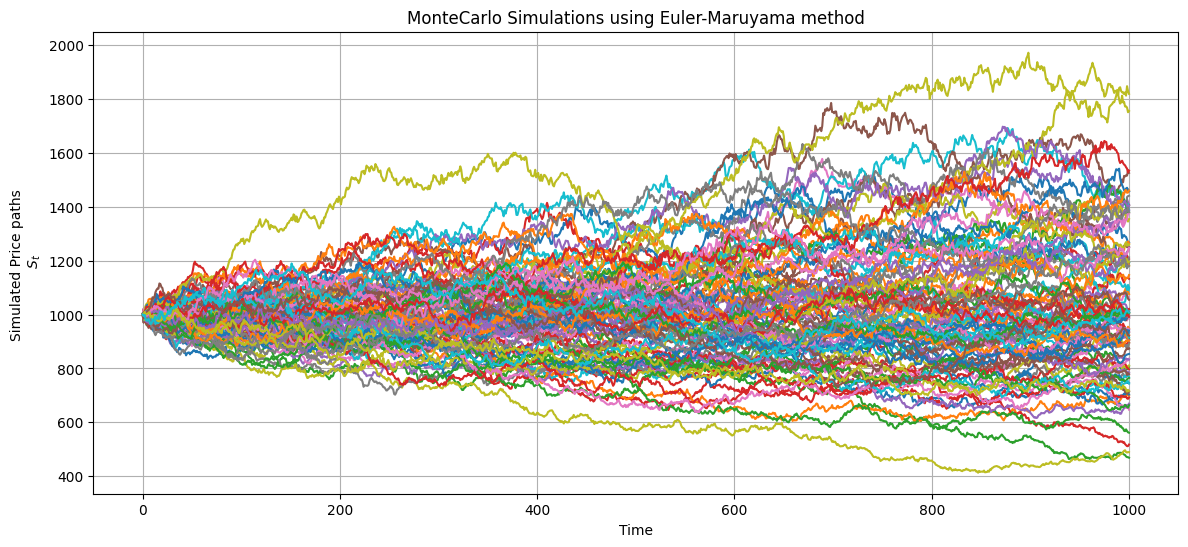

In [9]:
plt.figure(figsize=(14,6))

for i in range(100):
    plt.plot(St[i])

plt.xlabel("Time")
plt.ylabel("Simulated Price paths \n $S_t$")
plt.title("MonteCarlo Simulations using Euler-Maruyama method")
plt.grid(True)
plt.show()

In [10]:
price_european_call = european_call(St,1000,r,T)
price_arithmetic_asian = arithmetic_asian_call(St,1000,r,T)
price_geometric_asian = geometric_asian_call(St,1000,r,T)
price_floating_lookback = floating_lookback_call(St,r,T)

print("European call option price: ",price_european_call)
print("Arithmetic Asian call option price: ",price_arithmetic_asian)
print("Geometric Asian call option price: ",price_geometric_asian)
print("Floating lookback call option price: ",price_floating_lookback)

European call option price:  76.92801700233048
Arithmetic Asian call option price:  68.75798116907629
Geometric Asian call option price:  65.60544734667829
Floating lookback call option price:  199.73725452599498
